In [3]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.Collecting yfinance
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
     ---------------------------------------- 0.0/3.0 MB ? eta -:--:--
      --------------------------------------- 0.0/3.0 MB 326.8 kB/s eta 0:00:09
      --------------------------------------- 0.0/3.0 MB 326.8 kB/s eta 0:00:09
     - -------------------------------------- 0.1/3.0 MB 381.3 kB/s eta 0:00:08
     - -------------------------------------- 0.1/3.0 MB 381.3 kB/s eta 0:00:08
     - -------------------------------------- 0.1/3.0 MB 327.2 kB/s eta 0:00:09
     - -------------------------------------- 0.1/3.0 MB 327.2 kB/s eta 0:00:09
     - -------------------------------------- 0.1/3.0 MB 327.2 kB/s eta 0:00:09
     - -------------------------------------- 0.1/3.0 MB 327.2 kB/s eta 0:00:09
     --- ------------------------------------ 0.2/3.0 MB 456.4

## Import Necessary Libraries

In [4]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split


In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split

## 1. Data Feteching from Yahoo Finance

In [6]:
#pip install yfinance

In [14]:
# Ticker for Bajaj Auto Limited on the NSE
ticker = 'BAJAJ-AUTO.NS'

# Download the data
data = yf.download(ticker, start="2021-04-01", end="2024-03-31")

[*********************100%%**********************]  1 of 1 completed


In [15]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-01,3704.000000,3764.300049,3690.199951,3743.050049,3356.182861,861229
2021-04-05,3700.050049,3740.000000,3576.050049,3598.500000,3226.572754,723573
2021-04-06,3639.949951,3640.000000,3602.250000,3615.500000,3241.815918,501882
2021-04-07,3605.000000,3693.449951,3596.250000,3680.199951,3299.828369,346982
2021-04-08,3698.949951,3698.949951,3645.000000,3649.800049,3272.570801,414020


## 2. Select the Target Variable and Clean the data

In [16]:
# Select the Target Varibale Adj Close
df = data[['Adj Close']]

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
Adj Close    0
dtype: int64


### 2.1 Plot the time series

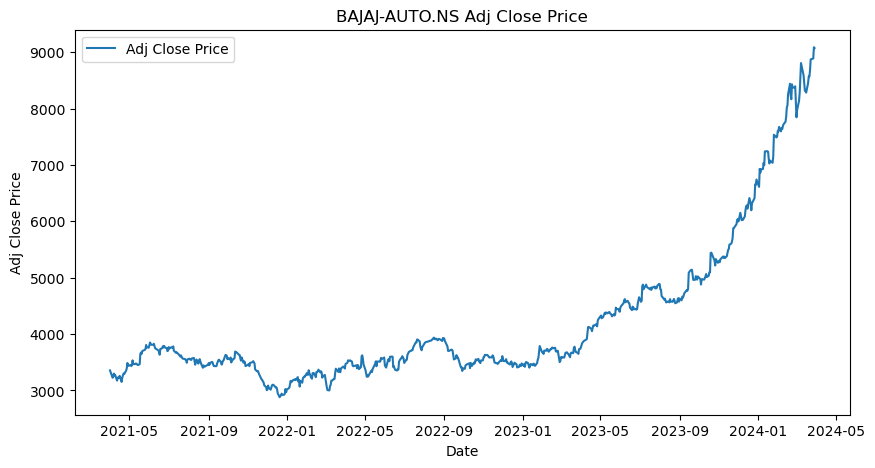

In [17]:
# Plot the data
plt.figure(figsize=(10, 5))
plt.plot(df, label='Adj Close Price')
plt.title('BAJAJ-AUTO.NS Adj Close Price')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.legend()
plt.show()

### 2.2 Decomposition of Time series

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
df.columns

Index(['Adj Close'], dtype='object')

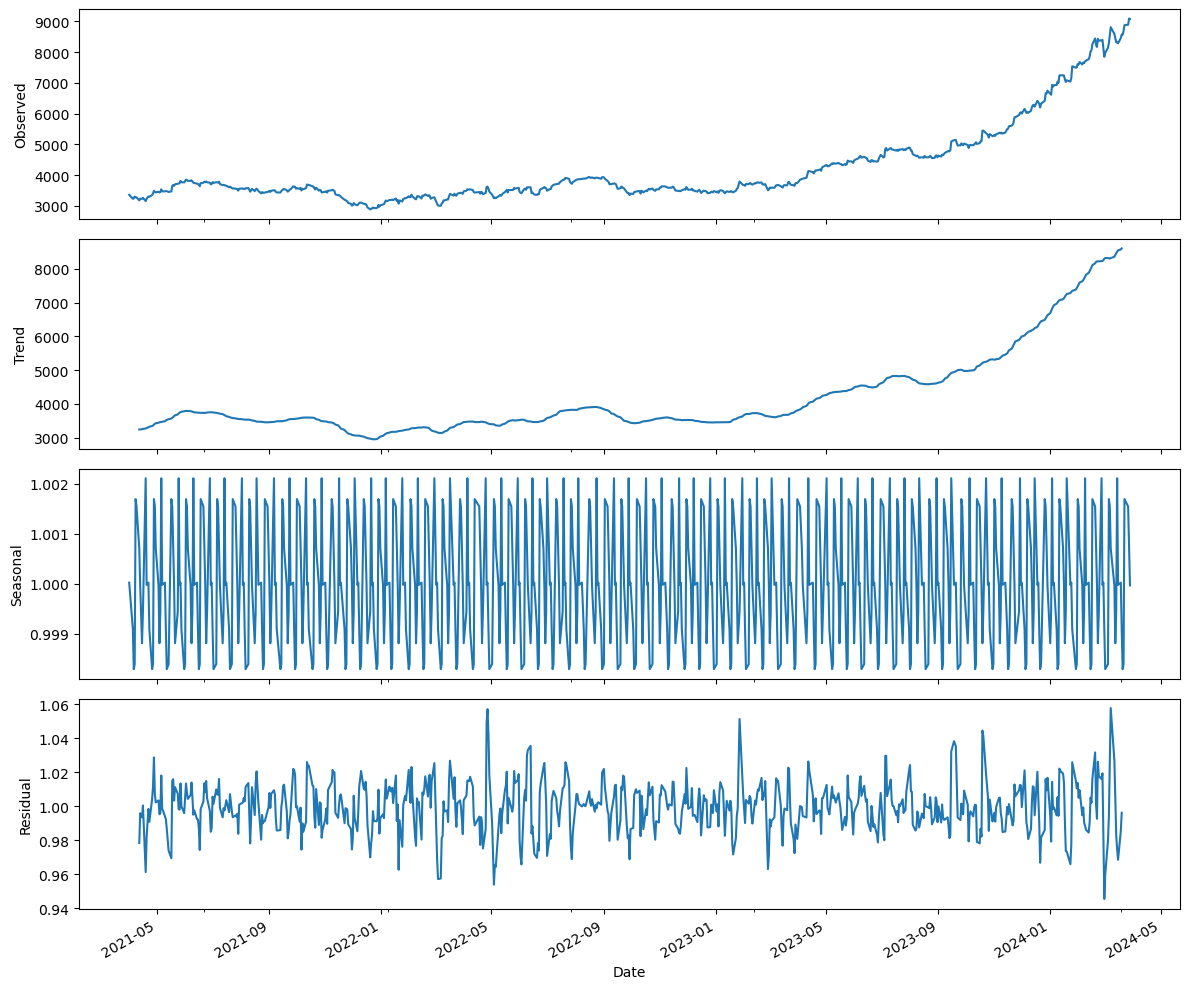

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Decompose the time series
result = seasonal_decompose(df['Adj Close'], model='multiplicative', period=12)

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.xlabel('Date')
plt.tight_layout()
plt.show()

In [21]:
# Split the data into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, shuffle=False)

## 3. Univariate Forecasting - Conventional Models/Statistical Models

### 3.1 HW Model

In [22]:
monthly_data = df.resample("M").mean()

In [23]:
# Split the data into training and test sets
train_data, test_data = train_test_split(monthly_data, test_size=0.2, shuffle=False)

In [24]:
len(monthly_data), len(train_data)

(36, 28)

In [25]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters model
holt_winters_model = ExponentialSmoothing(train_data, seasonal='mul', seasonal_periods=12).fit()

# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(12)

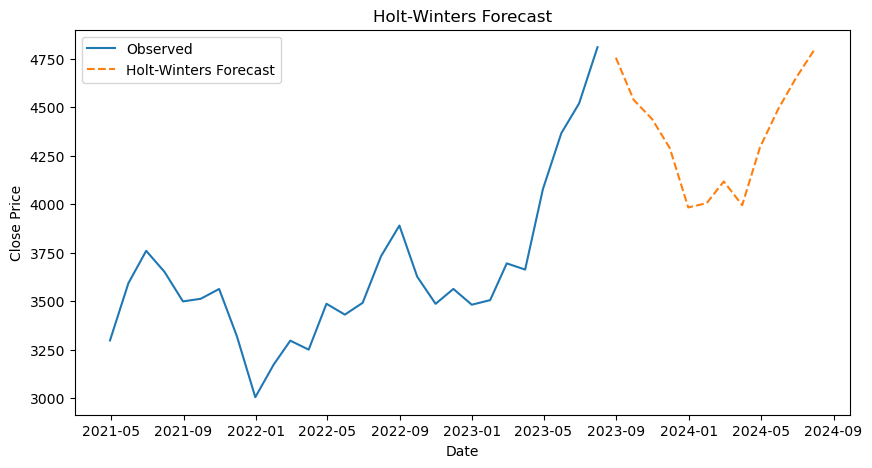

In [26]:
# Plot the forecast
plt.figure(figsize=(10, 5))
plt.plot(train_data, label='Observed')
plt.plot(holt_winters_forecast, label='Holt-Winters Forecast', linestyle='--')
plt.title('Holt-Winters Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [27]:
# Forecast for the next year (12 months)
y_pred = holt_winters_model.forecast(8)

In [28]:
len(test_data), len(y_pred)

(8, 8)

In [29]:
y_pred, test_data

(2023-08-31    4755.692420
 2023-09-30    4537.894289
 2023-10-31    4439.368933
 2023-11-30    4288.637439
 2023-12-31    3983.235309
 2024-01-31    4005.004947
 2024-02-29    4117.130109
 2024-03-31    3995.045136
 Freq: M, dtype: float64,
               Adj Close
 Date                   
 2023-08-31  4629.443359
 2023-09-30  4870.506055
 2023-10-31  5136.486694
 2023-11-30  5570.340747
 2023-12-31  6273.424121
 2024-01-31  7116.287644
 2024-02-29  7995.844076
 2024-03-31  8550.223741)

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, y_pred))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, y_pred)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - y_pred) / test_data)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, y_pred)
print(f'R-squared: {r2}')

RMSE: 2573.2864427267536
MAE: 2034.1307470358809
MAPE: nan
R-squared: -2.458194845667018


In [31]:
# Forecast for the next year (12 months)
holt_winters_forecast = holt_winters_model.forecast(len(test_data)+12)

In [32]:
holt_winters_forecast

2023-08-31    4755.692420
2023-09-30    4537.894289
2023-10-31    4439.368933
2023-11-30    4288.637439
2023-12-31    3983.235309
2024-01-31    4005.004947
2024-02-29    4117.130109
2024-03-31    3995.045136
2024-04-30    4293.240010
2024-05-31    4492.199676
2024-06-30    4652.268311
2024-07-31    4798.464679
2024-08-31    4755.692420
2024-09-30    4537.894289
2024-10-31    4439.368933
2024-11-30    4288.637439
2024-12-31    3983.235309
2025-01-31    4005.004947
2025-02-28    4117.130109
2025-03-31    3995.045136
Freq: M, dtype: float64

### 3.2 ARIMA Montly Data

In [39]:
monthly_data.columns

Index(['Adj Close'], dtype='object')

In [40]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [41]:
from pmdarima import auto_arima

In [42]:
# Fit auto_arima model
arima_model = auto_arima(train_data['Adj Close'], 
                         seasonal=True, 
                         m=12,  # Monthly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

# Print the model summary
print(arima_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   28
Model:             SARIMAX(0, 1, 1)x(1, 0, [], 12)   Log Likelihood                -177.156
Date:                             Mon, 22 Jul 2024   AIC                            360.311
Time:                                     21:12:45   BIC                            364.199
Sample:                                 04-30-2021   HQIC                           361.467
                                      - 07-31-2023                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.5972      0.233      2.562      0.010       0.140       1.054
ar.S.L12       0.3940      

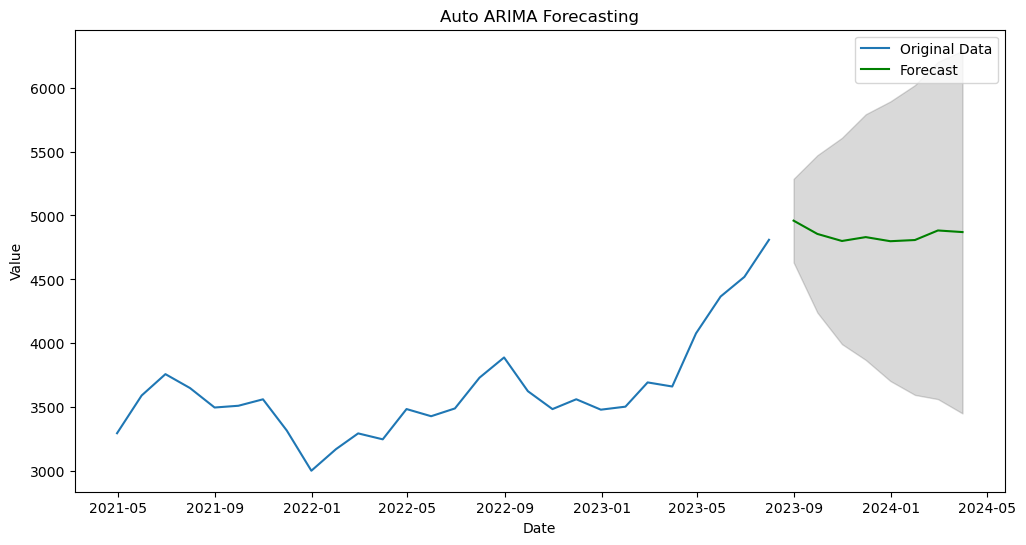

In [43]:
# Number of periods to forecast
n_periods = 8

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(train_data['Adj Close'], label='Original Data')
plt.plot(forecast.index, forecast, label='Forecast', color='green')
plt.fill_between(forecast.index, 
                 conf_int[:, 0], 
                 conf_int[:, 1], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

In [44]:
len(forecast)

8

In [45]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(test_data, forecast))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(test_data, forecast)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((test_data - forecast) / forecast)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(test_data, forecast)
print(f'R-squared: {r2}')

RMSE: 1984.5987694415235
MAE: 1499.6652542297497
MAPE: nan
R-squared: -1.0569258244969428


### 3.3 ARIMA Daily Data

In [46]:
daily_data= df.copy()

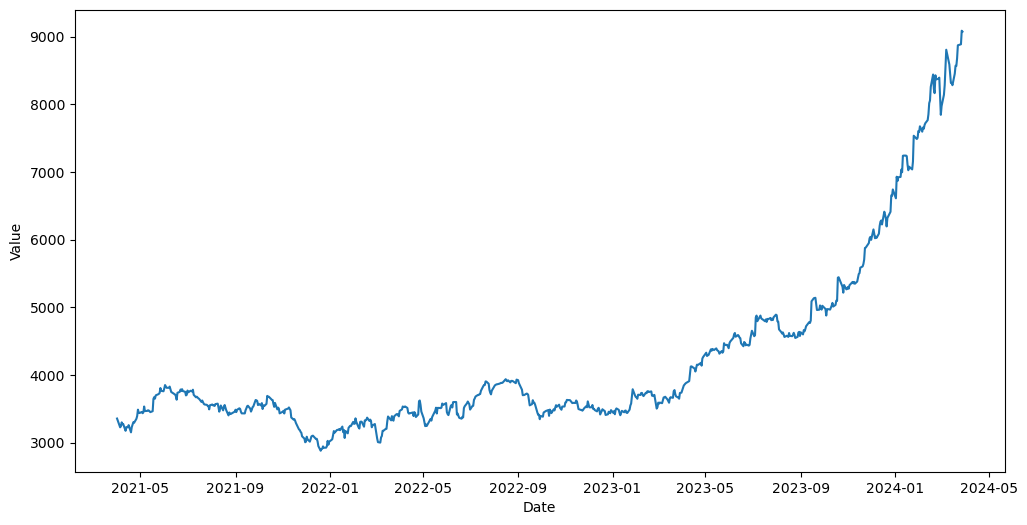

In [47]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'])
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [48]:
# Fit auto_arima model
arima_model = auto_arima(daily_data['Adj Close'], 
                         seasonal=True, 
                         m=7,  # Weekly seasonality
                         stepwise=True, 
                         suppress_warnings=True)

In [49]:
# Print the model summary
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  740
Model:               SARIMAX(0, 2, 1)   Log Likelihood               -4137.066
Date:                Mon, 22 Jul 2024   AIC                           8278.132
Time:                        21:13:21   BIC                           8287.340
Sample:                             0   HQIC                          8281.683
                                - 740                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9855      0.005   -212.927      0.000      -0.995      -0.976
sigma2      4315.5074    118.847     36.312      0.000    4082.572    4548.443
Ljung-Box (L1) (Q):                   0.42   Jarque-

In [50]:
# Generate in-sample predictions
fitted_values = arima_model.predict_in_sample()

In [51]:
fitted_values

Date
2021-04-01       0.000000
2021-04-05    5034.275046
2021-04-06    3112.145545
2021-04-07    3191.957409
2021-04-08    3285.838386
                 ...     
2024-03-21    8593.368060
2024-03-22    8708.695016
2024-03-26    8904.154309
2024-03-27    8919.100963
2024-03-28    9121.875113
Name: predicted_mean, Length: 740, dtype: float64

In [52]:
# Number of periods to forecast
n_periods = 60  # For example, forecast the next 30 days

# Generate forecast
forecast, conf_int = arima_model.predict(n_periods=n_periods, return_conf_int=True)

C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\USER\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [53]:
len(forecast)

60

In [55]:
len(future_dates)

NameError: name 'future_dates' is not defined

In [56]:
# Create future dates index
last_date = daily_data.index[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=n_periods)

# Convert forecast to a DataFrame with future_dates as the index
forecast_df = pd.DataFrame(forecast.values, index=future_dates, columns=['forecast'])
conf_int_df = pd.DataFrame(conf_int, index=future_dates, columns=['lower_bound', 'upper_bound'])

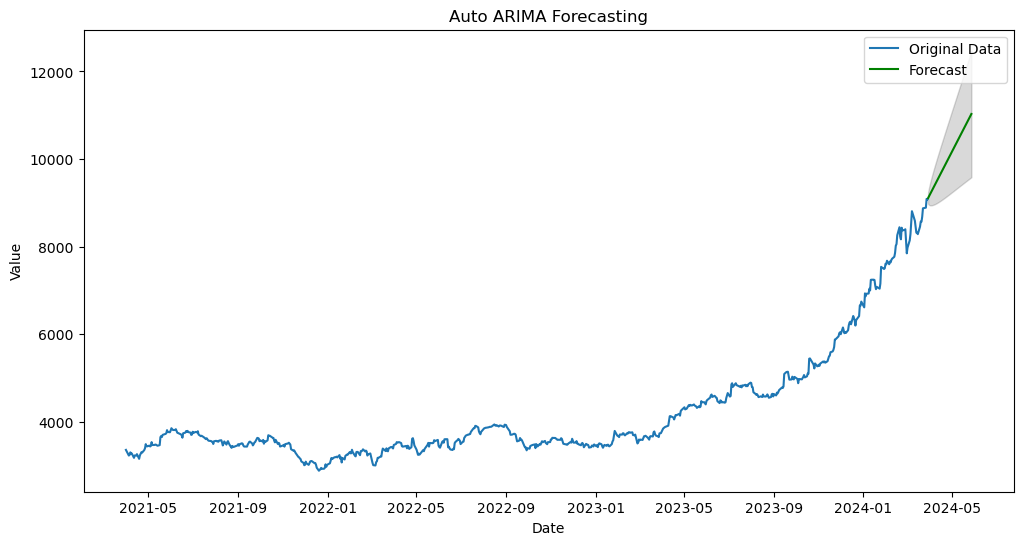

In [57]:
# Plot the original data, fitted values, and forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_data['Adj Close'], label='Original Data')
plt.plot(forecast_df, label='Forecast', color='green')
plt.fill_between(future_dates, 
                 conf_int_df['lower_bound'], 
                 conf_int_df['upper_bound'], 
                 color='k', alpha=.15)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Auto ARIMA Forecasting')
plt.show()

### 2. Multivariate Forecasting - Machine Learning Models

In [ ]:
pip install tensorflow
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [ ]:
data.head()

In [91]:
# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Select features (excluding 'Adj Close') and target ('Adj Close')
features = data.drop(columns=['Adj Close'])
target = data[['Adj Close']]

# Fit the scaler on features and target
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target)

# Create DataFrame with scaled features and target
scaled_df = pd.DataFrame(scaled_features, columns=features.columns, index=df.index)
scaled_df['Adj Close'] = scaled_target

In [92]:
import numpy as np

# Function to create sequences
def create_sequences(scaled_df, target_col, sequence_length):
    sequences = []
    labels = []
    for i in range(len(scaled_df) - sequence_length):
        sequences.append(scaled_df[i:i + sequence_length])
        labels.append(scaled_df[i + sequence_length, target_col])  # Target column index
    return np.array(sequences), np.array(labels)

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index and sequence length
target_col = scaled_df.columns.get_loc('Adj Close')
sequence_length = 30

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (710, 30, 6)
Shape of y: (710,)


In [93]:
# Split the data into training and testing sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 6)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

C:\Users\USER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [94]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 30, 50)              │          11,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 30, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,651 (123.64 KB)

 Trainable params: 31,651 (123.64 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), shuffle=False)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 20s 267ms/step - loss: 0.0048 - val_loss: 0.0078
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 9.1040e-04 - val_loss: 0.0026
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - loss: 0.0014 - val_loss: 0.0020
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0013 - val_loss: 7.6717e-04
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 7.9679e-04 - val_loss: 0.0012
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 8.1936e-04 - val_loss: 0.0025
Epoch 9/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0014 - val_loss: 0.0012
Epoch 10/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 8.9051e-04 - val_loss: 7.9379e-04
Epoch 11/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 4.9307e-04 - val_loss: 0.0015
Epoch 12/20
18/18 ━━━━━━━━━━━━━━━

In [96]:
# Predict on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and true values to get them back to the original scale
y_test_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_test), 5)), y_test.reshape(-1, 1)), axis=1))[:, 5]
y_pred_scaled = scaler.inverse_transform(np.concatenate((np.zeros((len(y_pred), 5)), y_pred), axis=1))[:, 5]

4/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/stepWARNING:tensorflow:5 out of the last 11 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x00000223E34498A0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 592ms/step


In [97]:
# Print some predictions and true values
print("Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_scaled[i]}, True Value: {y_test_scaled[i]}")

Predictions vs True Values:
Prediction: 4575.472506843929, True Value: 4637.31103515625
Prediction: 4580.115469411197, True Value: 4576.6044921875
Prediction: 4579.971157364875, True Value: 4630.814453125
Prediction: 4580.0684754884205, True Value: 4599.76611328125
Prediction: 4581.615389615734, True Value: 4663.69677734375
Prediction: 4587.673350298741, True Value: 4646.0400390625
Prediction: 4598.119507282623, True Value: 4679.17138671875
Prediction: 4609.4685396332425, True Value: 4721.17919921875
Prediction: 4627.96989901815, True Value: 4767.65185546875
Prediction: 4654.589181039599, True Value: 4781.7373046875


In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test_scaled, y_pred_scaled))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test_scaled, y_pred_scaled)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test_scaled - y_pred_scaled) / y_pred_scaled)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test_scaled, y_pred_scaled)
print(f'R-squared: {r2}')

RMSE: 186.96668528890703
MAE: 142.15715840251485
MAPE: 2.2197490225614085
R-squared: 0.980501982747998


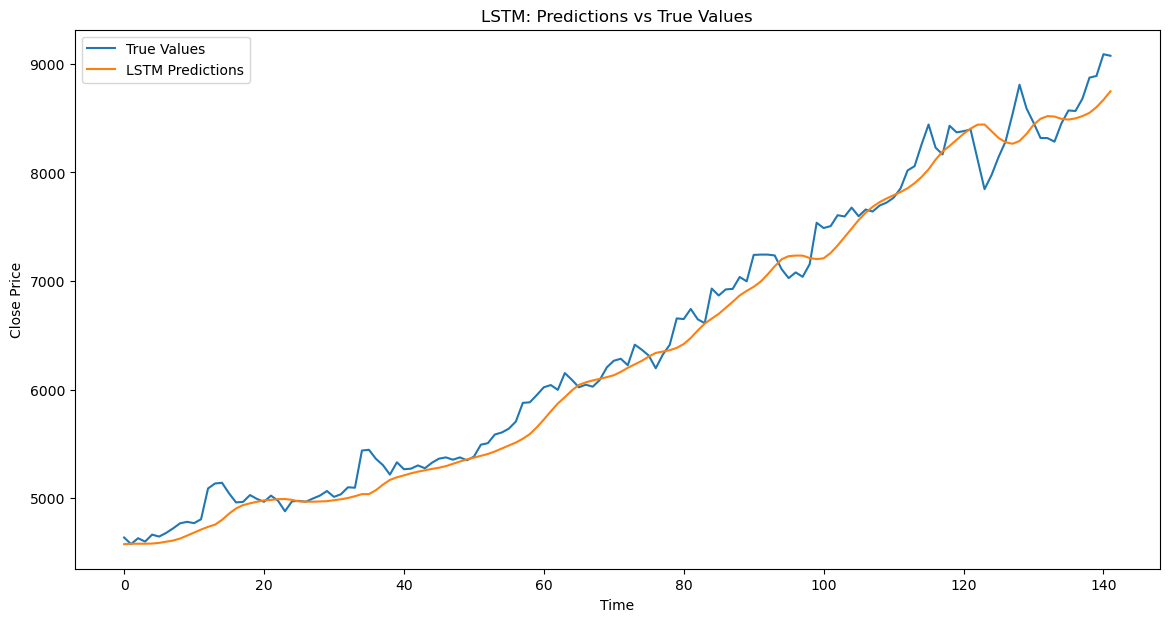

In [99]:
# Plot the predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test_scaled, label='True Values')
plt.plot(y_pred_scaled, label='LSTM Predictions')
plt.title('LSTM: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()


### Tree Based Models

In [100]:
from sklearn.ensemble import RandomForestRegressor #ensemble model
from sklearn.tree import DecisionTreeRegressor #simple algo
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np

In [101]:
import numpy as np

def create_sequences(data, target_col, sequence_length):
    """
    Create sequences of features and labels for time series data.
    
    Parameters:
    - data (np.ndarray): The input data where the last column is the target.
    - target_col (int): The index of the target column in the data.
    - sequence_length (int): The length of each sequence.

    Returns:
    - np.ndarray: 3D array of sequences (samples, sequence_length, num_features)
    - np.ndarray: 1D array of target values
    """
    num_samples = len(data) - sequence_length
    num_features = data.shape[1]
    
    sequences = np.zeros((num_samples, sequence_length, num_features))
    labels = np.zeros(num_samples)

    for i in range(num_samples):
        sequences[i] = data[i:i + sequence_length]
        labels[i] = data[i + sequence_length, target_col]  # Target is specified column

    return sequences, labels

# Example usage
sequence_length = 30

# Convert DataFrame to NumPy array
data_array = scaled_df.values

# Define the target column index
target_col = scaled_df.columns.get_loc('Adj Close')

# Create sequences
X, y = create_sequences(data_array, target_col, sequence_length)

# Flatten X for Decision Tree
num_samples, seq_length, num_features = X.shape
X_flattened = X.reshape(num_samples, seq_length * num_features)

In [102]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

In [103]:
# Train Decision Tree model
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'MSE (Decision Tree): {mse_dt}')

MSE (Decision Tree): 0.00029510847935726073


In [104]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_dt)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_dt)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_dt)
print(f'R-squared: {r2}')

RMSE: 0.017178721703236848
MAE: 0.011507040429560076
MAPE: 6703897.574425789
R-squared: 0.9942607115238074


In [105]:
# Train and evaluate the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest Mean Squared Error: {mse_rf}")

Random Forest Mean Squared Error: 0.00014993063868266724


In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'RMSE: {rmse}')

# Compute MAE
mae = mean_absolute_error(y_test, y_pred_rf)
print(f'MAE: {mae}')

# Compute MAPE
mape = np.mean(np.abs((y_test - y_pred_scaled) / y_pred_rf)) * 100
print(f'MAPE: {mape}')
# Compute R-squared
r2 = r2_score(y_test, y_pred_rf)
print(f'R-squared: {r2}')

RMSE: 0.012244616722571076
MAE: 0.008640771319086422
MAPE: 6266154.658461388
R-squared: 0.9970841394029281


In [107]:
# Print some predictions and true values for both models
print("\nDecision Tree Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_dt[i]}, True Value: {y_test[i]}")


Decision Tree Predictions vs True Values:
Prediction: 0.156473356939813, True Value: 0.16500050003285704
Prediction: 0.11168138496241731, True Value: 0.11229396945430425
Prediction: 0.9977072815126782, True Value: 0.8976278779466791
Prediction: 0.12096949036643345, True Value: 0.10961294389418985
Prediction: 0.09363619607092544, True Value: 0.10250657839136812
Prediction: 0.049542382434960563, True Value: 0.050042965859062094
Prediction: 0.23727949249044245, True Value: 0.23640346166671034
Prediction: 0.10024276467399806, True Value: 0.10713877423876339
Prediction: 0.09611858490583469, True Value: 0.10860316460432773
Prediction: 0.8956946010884159, True Value: 0.8840705576839123


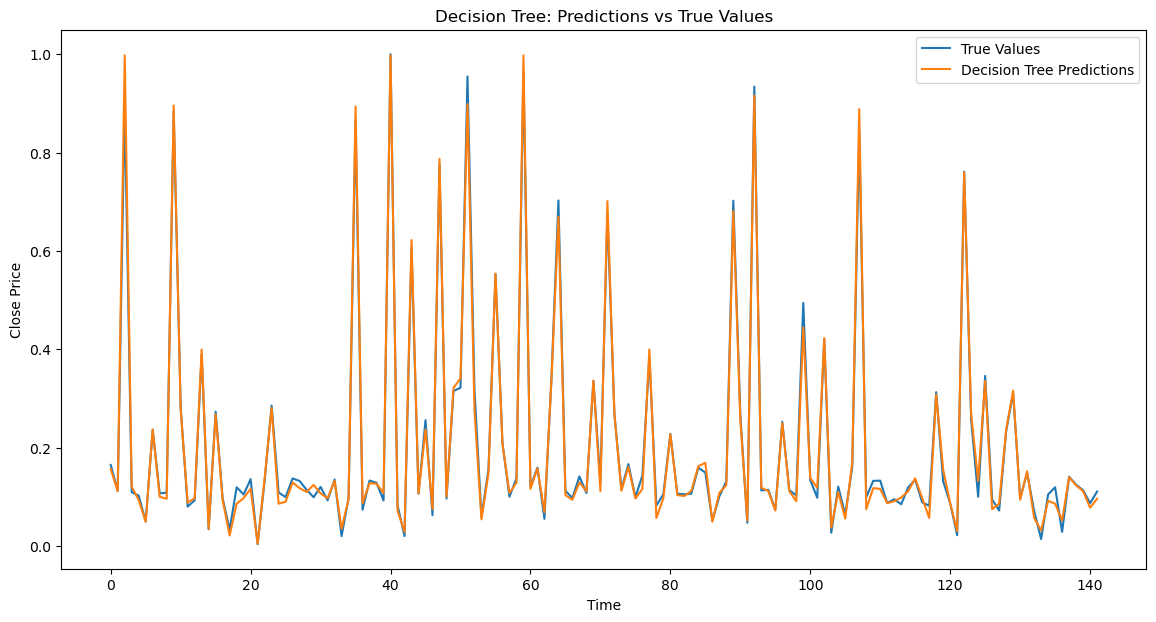

In [108]:
# Plot the predictions vs true values for Decision Tree
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.title('Decision Tree: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [109]:
print("\nRandom Forest Predictions vs True Values:")
for i in range(10):
    print(f"Prediction: {y_pred_rf[i]}, True Value: {y_test[i]}")


Random Forest Predictions vs True Values:
Prediction: 0.15752957066113157, True Value: 0.16500050003285704
Prediction: 0.10498719518691138, True Value: 0.11229396945430425
Prediction: 0.8964736558190668, True Value: 0.8976278779466791
Prediction: 0.10479553886533396, True Value: 0.10961294389418985
Prediction: 0.09286474939033545, True Value: 0.10250657839136812
Prediction: 0.05354774472203815, True Value: 0.050042965859062094
Prediction: 0.2410403986829021, True Value: 0.23640346166671034
Prediction: 0.10467858348065259, True Value: 0.10713877423876339
Prediction: 0.10507974275462616, True Value: 0.10860316460432773
Prediction: 0.8775618979918026, True Value: 0.8840705576839123


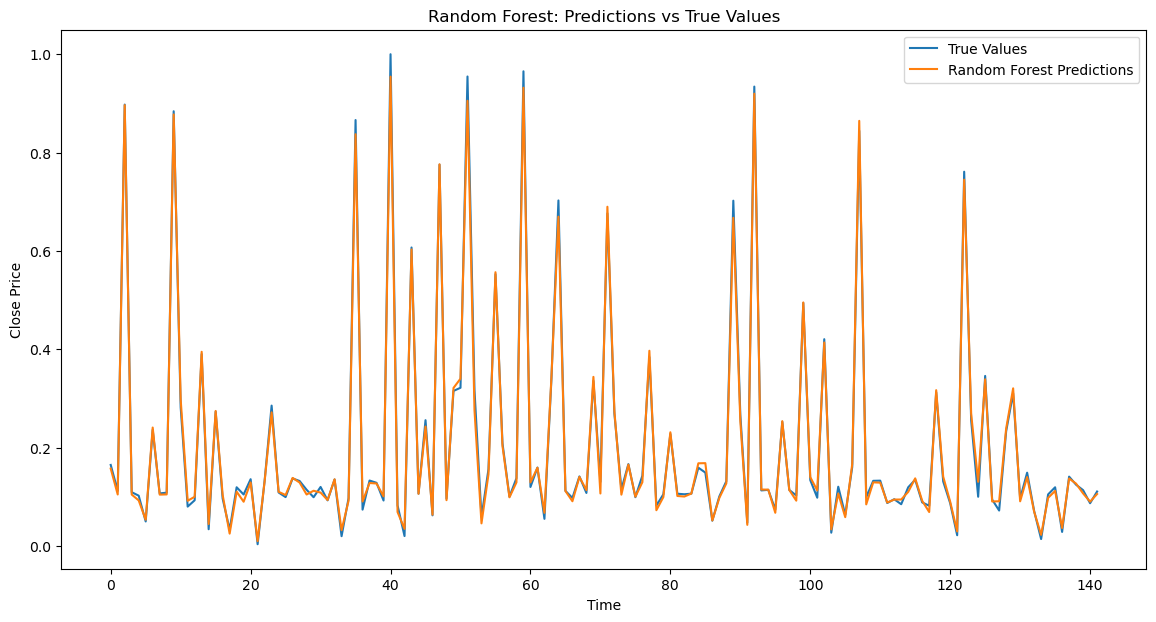

In [110]:
# Plot the predictions vs true values for Random Forest
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()

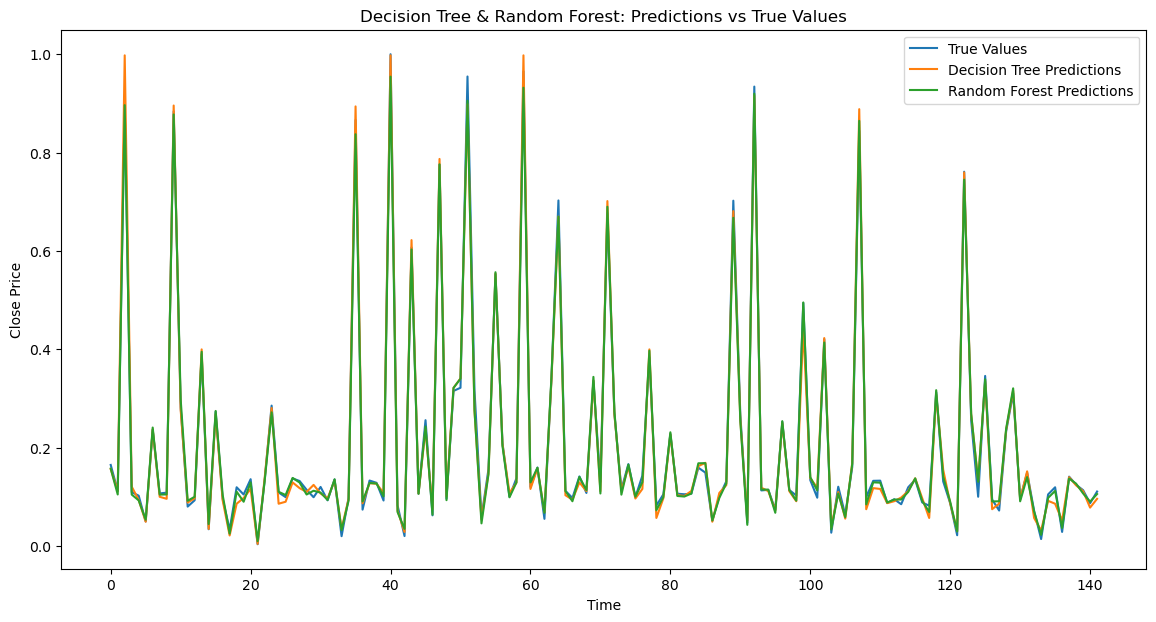

In [111]:
# Plot both Decision Tree and Random Forest predictions together
plt.figure(figsize=(14, 7))
plt.plot(y_test, label='True Values')
plt.plot(y_pred_dt, label='Decision Tree Predictions')
plt.plot(y_pred_rf, label='Random Forest Predictions')
plt.title('Decision Tree & Random Forest: Predictions vs True Values')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend()
plt.show()